In [164]:
import pandas as pd
data = pd.read_csv('sales_data_1.csv')

In [165]:
data.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [178]:
# 1. Calculate overall gross margin
data['Profit'] = data['Selling price'] - data['Buying price']
overall_gross_margin = (data['Profit'].sum() / data['Selling price'].sum()) * 100

In [179]:
# 2. Find the most profitable vendor
most_profitable_vendor = data.groupby('Firm bought from')['Profit'].sum().idxmax()

In [180]:
# 3. Find the least profitable customer
least_profitable_customer = data.groupby('Customer')['Profit'].sum().idxmin()

In [181]:
# 4. Find the most profitable day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()
most_profitable_day = data.groupby('DayOfWeek')['Profit'].sum().idxmax()

In [182]:
# 5. Find the least profitable day of the week
least_profitable_day = data.groupby('DayOfWeek')['Profit'].sum().idxmin()

In [183]:
print(f'Overall Gross Margin: {overall_gross_margin:.2f}%')
print(f'Most Profitable Vendor: {most_profitable_vendor}')
print(f'Least Profitable Customer: {least_profitable_customer}')
print(f'Most Profitable Day of the Week: {most_profitable_day}')
print(f'Least Profitable Day of the Week: {least_profitable_day}')

Overall Gross Margin: 23.33%
Most Profitable Vendor: Vendor7
Least Profitable Customer: Customer9
Most Profitable Day of the Week: Monday
Least Profitable Day of the Week: Thursday


In [184]:
data = pd.read_csv('sales_data_2.csv')

6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 

In [190]:
data['DailyProfit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']
data['3DayAvgProfit'] = data['DailyProfit'].rolling(window=3).mean()
print(data[['Date', 'DailyProfit', '3DayAvgProfit']])

          Date  DailyProfit  3DayAvgProfit
0   2023-08-21       856.68            NaN
1   2023-08-21       146.71            NaN
2   2023-08-21       297.45     433.613333
3   2023-08-21        87.64     177.266667
4   2023-08-21        42.01     142.366667
..         ...          ...            ...
65  2023-08-27       407.34     552.863333
66  2023-08-27        84.00     552.070000
67  2023-08-27       947.84     479.726667
68  2023-08-27       126.44     386.093333
69  2023-08-27        25.88     366.720000

[70 rows x 3 columns]


7.Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

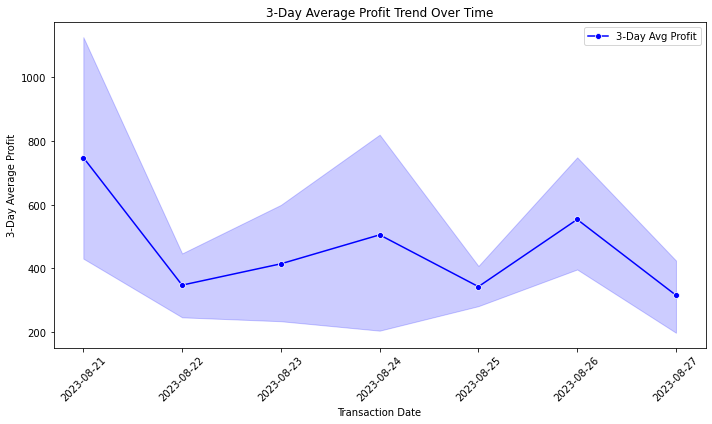

In [191]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Date'], y=data['3DayAvgProfit'], marker='o', color='b', label='3-Day Avg Profit')
plt.xlabel('Transaction Date')
plt.ylabel('3-Day Average Profit')
plt.title('3-Day Average Profit Trend Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

8.Can you optimize the sales process to ensure gross margin is maximized?
    a. Would you fire any vendor?
    b. Would you let go of any customer? 

In [192]:
data['Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

vendor_profit = data.groupby('Firm bought from')['Profit'].sum()


customer_profit = data.groupby('Customer')['Profit'].sum()

sorted_vendors = vendor_profit.sort_values(ascending=False)
sorted_customers = customer_profit.sort_values(ascending=False)

bottom_20_vendors = sorted_vendors.tail(int(0.2 * len(sorted_vendors)))
vendors_to_fire = bottom_20_vendors.index.tolist()

bottom_20_customers = sorted_customers.tail(int(0.2 * len(sorted_customers)))
customers_to_let_go = bottom_20_customers.index.tolist()

print("Vendors to Consider Firing:")
print(vendors_to_fire)
print("\nCustomers to Consider Letting Go:")
print(customers_to_let_go)


Vendors to Consider Firing:
['Vendor6', 'Vendor8']

Customers to Consider Letting Go:
['Customer5', 'Customer3']


9.To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

In [193]:

buying_price_percentiles = data['Buying price'].quantile([0.25, 0.5, 0.75])
selling_price_percentiles = data['Selling price'].quantile([0.25, 0.5, 0.75])

buying_price_percentiles = buying_price_percentiles.round(2)
selling_price_percentiles = selling_price_percentiles.round(2)

print('Buying Price Percentiles (Q1, Median, Q3):')
print('Q1 (25th percentile):', buying_price_percentiles[0.25])
print('Median (50th percentile):', buying_price_percentiles[0.5])
print('Q3 (75th percentile):', buying_price_percentiles[0.75])

print('\nSelling Price Percentiles (Q1, Median, Q3):')
print('Q1 (25th percentile):', selling_price_percentiles[0.25])
print('Median (50th percentile):', selling_price_percentiles[0.5])
print('Q3 (75th percentile):', selling_price_percentiles[0.75])

Buying Price Percentiles (Q1, Median, Q3):
Q1 (25th percentile): 29.9
Median (50th percentile): 60.76
Q3 (75th percentile): 78.32

Selling Price Percentiles (Q1, Median, Q3):
Q1 (25th percentile): 38.98
Median (50th percentile): 78.99
Q3 (75th percentile): 103.4


10.Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [194]:
buying_price_q1 = data['Buying price'].quantile(0.25)
buying_price_q3 = data['Buying price'].quantile(0.75)
selling_price_q1 = data['Selling price'].quantile(0.25)
selling_price_q3 = data['Selling price'].quantile(0.75)

below_q1_buying_price = len(data[data['Buying price'] < buying_price_q1])
above_q3_buying_price = len(data[data['Buying price'] > buying_price_q3])
below_q1_selling_price = len(data[data['Selling price'] < selling_price_q1])
above_q3_selling_price = len(data[data['Selling price'] > selling_price_q3])


print('Number of Transactions where Sapota\'s Buying Price falls below Q1:', below_q1_buying_price)
print('Number of Transactions where Sapota\'s Buying Price exceeds Q3:', above_q3_buying_price)
print('Number of Transactions where Sapota\'s Selling Price falls below Q1:', below_q1_selling_price)
print('Number of Transactions where Sapota\'s Selling Price exceeds Q3:', above_q3_selling_price)

Number of Transactions where Sapota's Buying Price falls below Q1: 18
Number of Transactions where Sapota's Buying Price exceeds Q3: 18
Number of Transactions where Sapota's Selling Price falls below Q1: 18
Number of Transactions where Sapota's Selling Price exceeds Q3: 18


11.Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin

In [195]:

total_profit_all_vendors = ((data['Selling price'] - data['Buying price']) * data['Quantity sold']).sum()

total_profit_vendor_4 = ((data[data['Firm bought from'] == "Vendor4"]['Selling price'] - data[data['Firm bought from'] == "Vendor4"]['Buying price']) * data[data['Firm bought from'] == "Vendor4"]['Quantity sold']).sum()


impact_on_margin_percentage = ((total_profit_all_vendors - total_profit_vendor_4) / total_profit_all_vendors) * 100

print('Total Profit Considering All Vendors:', round(total_profit_all_vendors,2))
print('Total Profit Considering Vendor 4 Alone:', round(total_profit_vendor_4,2))
print("Percentage of Vendor 4 alone contributes on Gross Margin from the Other 9 Vendors:{}%".format(round(100 - impact_on_margin_percentage)))


Total Profit Considering All Vendors: 31482.75
Total Profit Considering Vendor 4 Alone: 6903.31
Percentage of Vendor 4 alone contributes on Gross Margin from the Other 9 Vendors:22%


12 Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?

In [196]:
data['GrossMargin'] = (data['Selling price'] - data['Buying price']) / data['Buying price'] * 100


max_margin_vendor = data.loc[data['GrossMargin'].idxmax()]


theoretical_max_margin = ((max_margin_vendor['Selling price'] - max_margin_vendor['Buying price']) / max_margin_vendor['Buying price']) * 100


print('Vendor with the Highest Gross Margin:',max_margin_vendor['Firm bought from'])
print('Gross Margin: {:.2f}%'.format(max_margin_vendor['GrossMargin']))
print('Theoretical Maximum Margin if sourcing only from this vendor: {:.2f}%'.format(theoretical_max_margin))

Vendor with the Highest Gross Margin: Vendor9
Gross Margin: 49.98%
Theoretical Maximum Margin if sourcing only from this vendor: 49.98%


13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

In [197]:

data = data[data["Firm bought from"]=="Vendor9"]


original_quantity_sold = data['Quantity sold'].sum()
original_selling_price = data['Selling price'].mean()


new_selling_price_increase = original_selling_price + 1
new_quantity_sold_increase = (original_quantity_sold * new_selling_price_increase) / original_selling_price


percentage_change_quantity_sold = ((new_quantity_sold_increase - original_quantity_sold) / original_quantity_sold) * 100
percentage_change_selling_price = ((new_selling_price_increase - original_selling_price) / original_selling_price) * 100
price_elasticity_increase = percentage_change_quantity_sold / percentage_change_selling_price


new_selling_price_decrease = original_selling_price - 1
new_quantity_sold_decrease = (original_quantity_sold * new_selling_price_decrease) / original_selling_price


percentage_change_quantity_sold = ((new_quantity_sold_decrease - original_quantity_sold) / original_quantity_sold) * 100
percentage_change_selling_price = ((new_selling_price_decrease - original_selling_price) / original_selling_price) * 100
price_elasticity_decrease = percentage_change_quantity_sold / percentage_change_selling_price


print('Price Elasticity of Sapota for Vendor9 (Increase by Rs. 1):', price_elasticity_increase)
print('Price Elasticity of Sapota for Vendor9 (Decrease by Rs. 1):', price_elasticity_decrease)


Price Elasticity of Sapota for Vendor9 (Increase by Rs. 1): 0.9999999999999996
Price Elasticity of Sapota for Vendor9 (Decrease by Rs. 1): 0.9999999999999996
